In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

####  download handwritten dataset from keras library

In [16]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 33s 3us/step


In [18]:
len(x_train)

60000

In [20]:
len(x_test)

10000

In [26]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [28]:
y_train[0]

5

In [30]:
y_test[0]

7

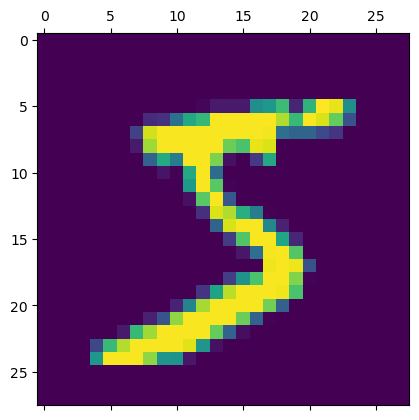

In [66]:
plt.matshow(x_train[0])

In [40]:
x_train.shape

(60000, 28, 28)

##### here in the above 6000 is the number of samples but the second and third are dimenssions of single image(sample) now we flatten the 2_dimenssional image in to single dimenssion it becomes (6000,784)

In [55]:
x_train_flatten=x_train.reshape(len(x_train),784 )
x_test_flatten=x_test.reshape(len(x_test),784)

#### now we should scale our data between 0 and one by dividing with 255 it is the white colour

In [81]:
x_train_flatten=x_train_flatten/255
x_test_flatten=x_test_flatten/255

In [83]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
                       ])
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
#parse_categorical_crossentropy....the out put is integer->sparse and categorical
model.fit(x_train_flatten,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8202 - loss: 0.7045
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9139 - loss: 0.3076
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9199 - loss: 0.2853
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9223 - loss: 0.2789
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9266 - loss: 0.2689
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9284 - loss: 0.2563
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9290 - loss: 0.2555
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9284 - loss: 0.2617
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9295 - loss: 0.2531
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9324 - loss: 0.2478


### let us check our model's accuracywith our test data 

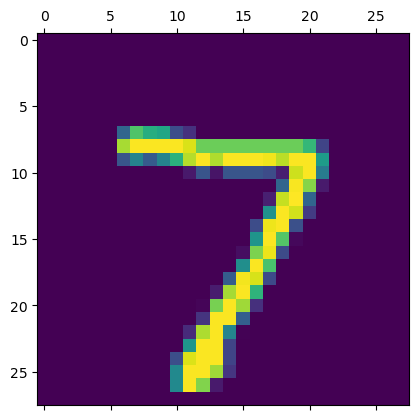

In [91]:
plt.matshow(x_test[0])

In [97]:
y_predicted=model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [107]:

print(y_predicted[0])
print(max(y_predicted[0]))

[4.4370666e-03 2.1885333e-08 1.2264665e-02 9.5640409e-01 1.2359810e-03
 1.3740803e-01 2.7635958e-08 9.9989909e-01 7.5623520e-02 7.5926942e-01]
0.9998991


In [109]:
# we can print the arguement 
np.argmax(y_predicted[0])

7

In [113]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:5])
print(y_test[:5])

[7, 2, 1, 0, 4]
[7 2 1 0 4]


In [121]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    7,    3,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   7,    8,  922,   13,    6,    4,   10,   13,   44,    5],
       [   5,    0,   21,  900,    0,   31,    2,   11,   29,   11],
       [   1,    1,    6,    1,  900,    0,    9,    4,    9,   51],
       [   9,    3,    2,   20,    8,  791,   11,    9,   30,    9],
       [  13,    3,    8,    1,    7,   19,  903,    2,    2,    0],
       [   1,    6,   24,    2,    5,    1,    0,  948,    2,   39],
       [   7,    8,    6,   14,    9,   29,    6,   10,  870,   15],
       [  11,    7,    1,    7,   15,    7,    0,   14,    5,  942]])>

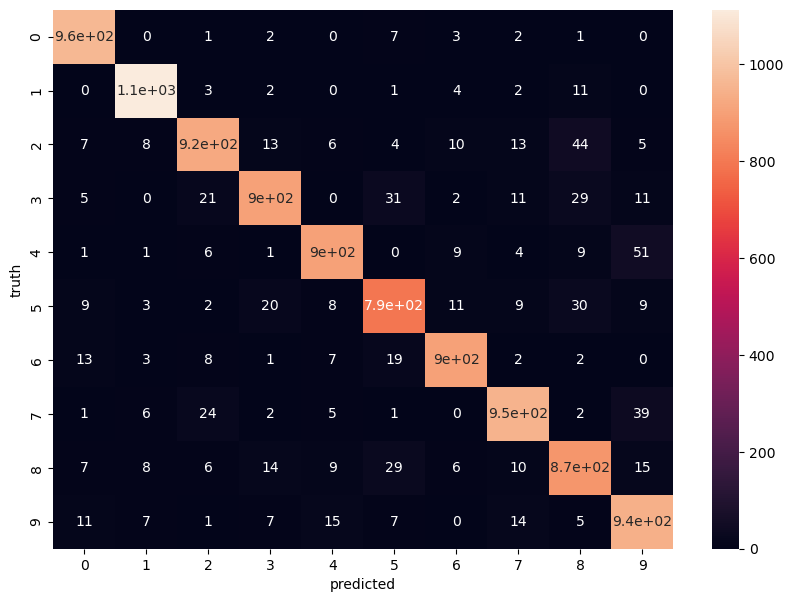

In [129]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.show()

### now let's add more hidden layer to our model to optimize it

In [155]:
model1=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
                       ])
model1.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
#parse_categorical_crossentropy....the out put is integer->sparse and categorical
model1.fit(x_train_flatten,y_train,epochs=10)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8678 - loss: 0.4615
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9618 - loss: 0.1316
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9729 - loss: 0.0919
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9798 - loss: 0.0690
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9849 - loss: 0.0531
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9881 - loss: 0.0417
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9908 - loss: 0.0326
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9932 - loss: 0.0245
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9934 - loss: 0.0220
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9942 - loss: 0.0186


In [157]:
y_predicted_1=model1.predict(x_test_flatten)
y_predicted_labels_1=[np.argmax(i) for i in y_predicted_1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [159]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_1)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    1,    0,    1,    0,    3,    1,    0,    1],
       [   0, 1127,    3,    1,    0,    0,    2,    0,    2,    0],
       [   8,    1, 1002,    3,    4,    0,    3,    5,    6,    0],
       [   0,    0,    5,  983,    0,    1,    0,    4,    3,   14],
       [   1,    0,    3,    1,  936,    0,    4,    2,    1,   34],
       [   1,    0,    0,    9,    1,  861,    6,    1,    5,    8],
       [   3,    2,    3,    1,    4,    2,  943,    0,    0,    0],
       [   2,    5,   11,    0,    1,    0,    0,  992,    2,   15],
       [   9,    1,    1,    5,    6,    2,    3,    4,  920,   23],
       [   2,    2,    0,    1,    7,    1,    2,    2,    0,  992]])>

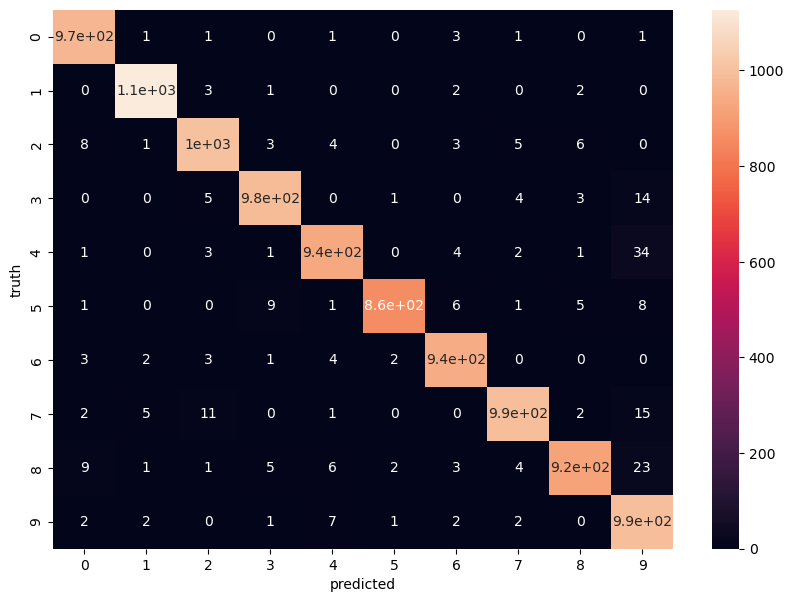

In [161]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
plt.show()